# Cardiovascular Disease

# Import libraries

Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Read Data

In [2]:
df = pd.read_csv("a4.csv")

In [3]:
# First 5 rows of our data
df.head()

,age,sex,bc,bp,hereditary,smoking,alcohol,exercise,diabetes,diet,obesity,stress,target
0,69,1,197,101,1,0,1,1,1,0,0,0,1
1,61,0,250,144,0,1,0,0,1,-1,1,1,0
2,35,0,182,123,0,0,1,0,0,1,0,0,1
3,29,1,170,131,0,0,1,1,0,0,0,0,1
4,38,0,192,123,1,0,1,1,1,0,0,1,1


# Data contains;
# Risk Factors Values 
1. Sex               ( Male (1), Female (0) )
2. Age (years)       ( 20-34 (-2), 35-50 (-1), 51-60 (0), 61-79 (1) , >79 (2) 3 
3. Blood Cholesterol  ( Below 200 mg/dL  -  Low (-1) 200-239 mg/dL -  Normal (0) 240 mg/dL and above -   High (1) 
4. Blood Pressure    ( Below 120 mm Hg-  Low (-1) 120 to 139 mm Hg-  Normal (0) Above 139 mm Hg-  High  (-1) )
5. Hereditary        ( Family Member diagnosed with HD  -Yes (1)    Otherwise –No (0) )
6. Smoking           ( Yes (1) or No (0) )
7. Alcohol Intake    ( Yes (1) or No (0) )
8. Physical Activity  ( Low (-1) , Normal (0) or High (1) )
9. Diabetes           ( Yes  (1) or  No (0) )
10. Diet             ( Poor (-1), Normal (0) or Good (1) )
11. Obesity          ( Yes (1) or No (0) )
12. Stress            ( Yes (1) or No (0) )
Heart Disease        ( Yes (1) or No (0))

In [4]:
df.describe()

,age,sex,bc,bp,hereditary,smoking,alcohol,exercise,diabetes,diet,obesity,stress,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,43.684385,0.534884,214.754153,133.172757,0.209302,0.372093,0.521595,0.043189,0.445183,-0.189369,0.425249,0.481728,0.445183
std,14.028901,0.499612,34.353156,16.777268,0.407488,0.484168,0.500365,0.684199,0.504465,0.721586,0.495204,0.500498,0.497814
min,21.000000,0.000000,105.000000,87.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,188.000000,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,41.000000,1.000000,216.000000,131.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,239.000000,143.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,79.000000,1.000000,290.000000,183.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

In [5]:
df.target.value_counts()

0    167
1    134
Name: target, dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

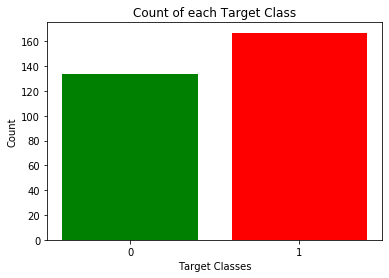

In [6]:
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

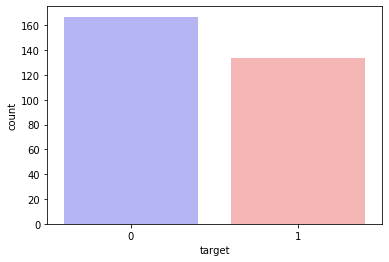

In [7]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [8]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 55.48%
Percentage of Patients Have Heart Disease: 44.52%


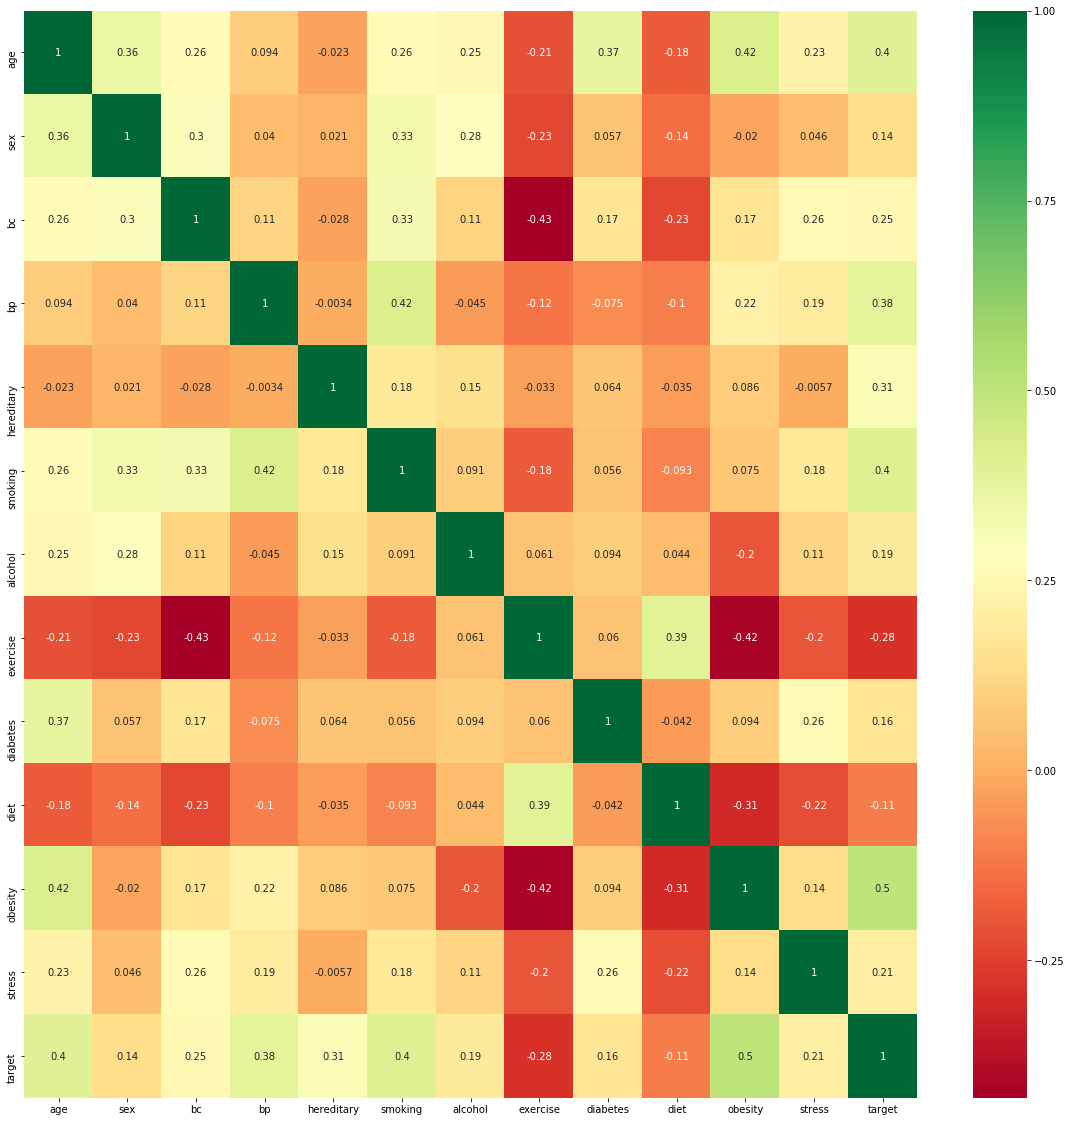

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive. Next, I'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263D4032B70>,
      dtype=object)

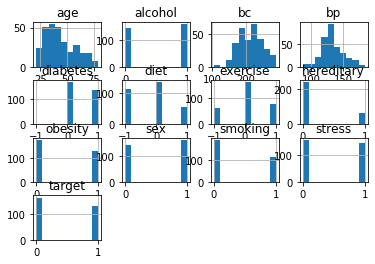

In [10]:
df.hist()

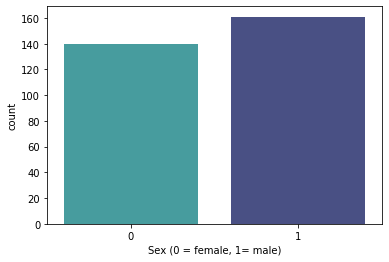

In [11]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [12]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 46.51%
Percentage of Male Patients: 53.49%


In [13]:
df.groupby('target').mean()

,age,sex,bc,bp,hereditary,smoking,alcohol,exercise,diabetes,diet,obesity,stress
target,,,,,,,,,,,,
0,38.664671,0.473054,206.976048,127.413174,0.095808,0.197605,0.437126,0.215569,0.371257,-0.119760,0.203593,0.389222
1,49.940299,0.611940,224.447761,140.350746,0.350746,0.589552,0.626866,-0.171642,0.537313,-0.276119,0.701493,0.597015


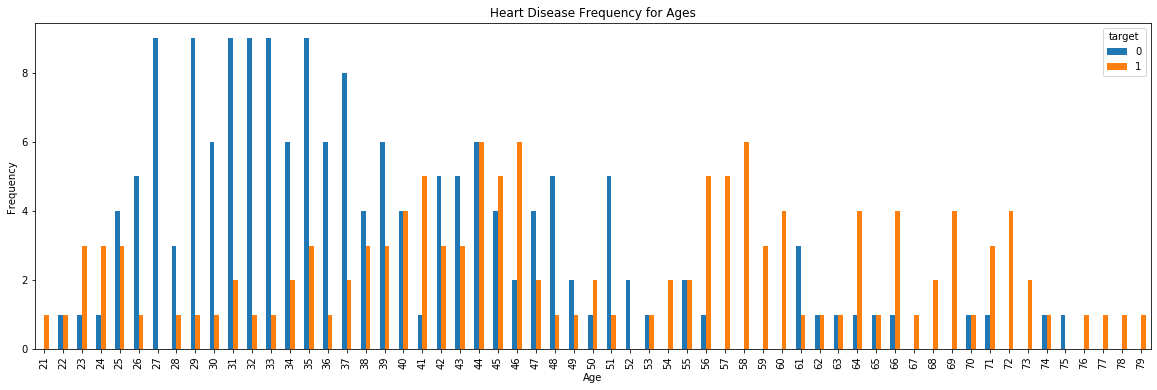

In [14]:

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

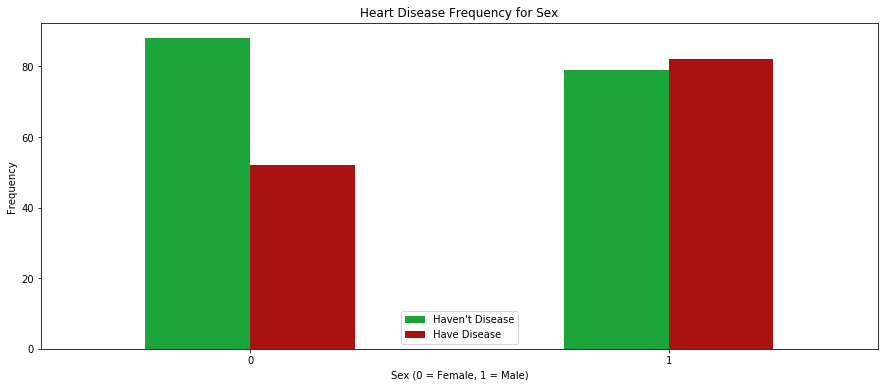

In [15]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

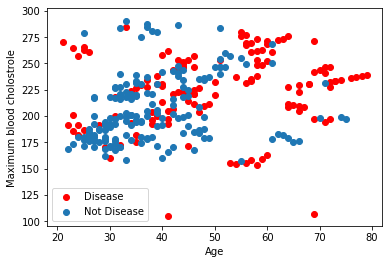

In [16]:
plt.scatter(x=df.age[df.target==1], y=df.bc[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.bc[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum blood cholostrole")
plt.show()

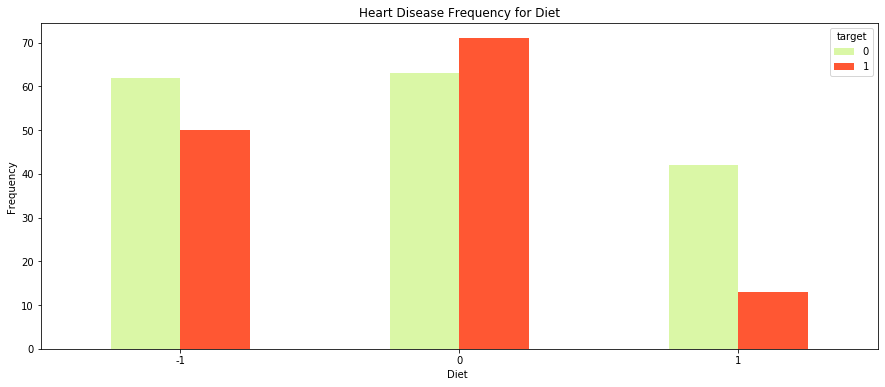

In [17]:
pd.crosstab(df.diet,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Diet')
plt.xlabel('Diet ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

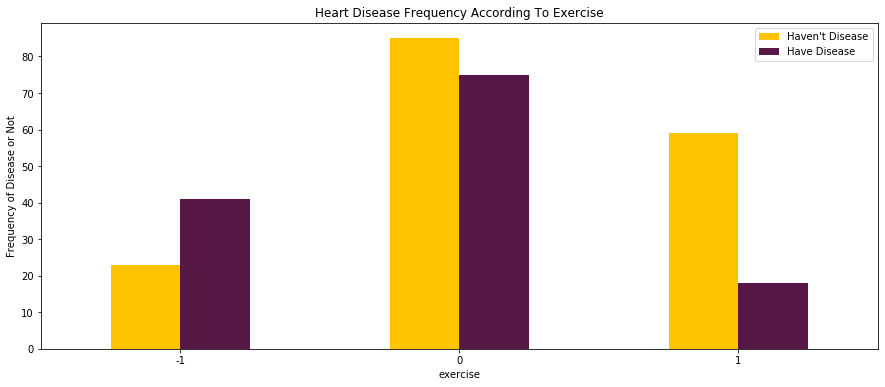

In [18]:
pd.crosstab(df.exercise,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To Exercise')
plt.xlabel('exercise')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

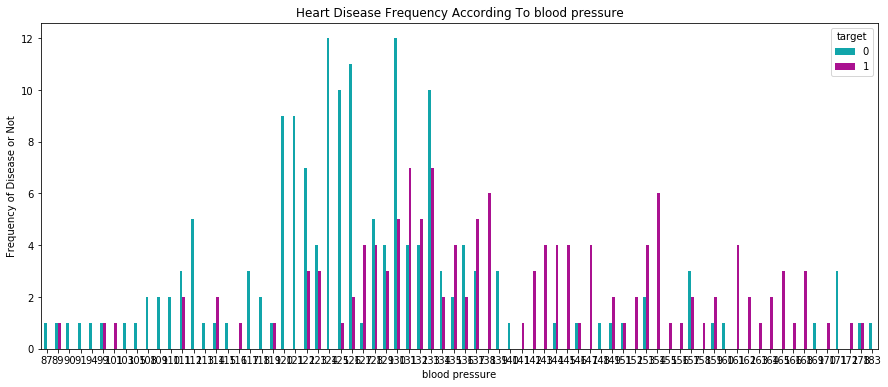

In [19]:
pd.crosstab(df.bp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To blood pressure')
plt.xlabel('blood pressure')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Creating Dummy Variables

Since 'exercise', 'diet'  are categorical variables we'll turn them into dummy variables.

In [20]:
a = pd.get_dummies(df['exercise'], prefix = "exercise")
b = pd.get_dummies(df['diet'], prefix = "diet")


In [21]:
frames = [df, a, b ]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,bc,bp,hereditary,smoking,alcohol,exercise,diabetes,diet,obesity,stress,target,exercise_-1,exercise_0,exercise_1,diet_-1,diet_0,diet_1
0,69,1,197,101,1,0,1,1,1,0,0,0,1,0,0,1,0,1,0
1,61,0,250,144,0,1,0,0,1,-1,1,1,0,0,1,0,1,0,0
2,35,0,182,123,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
3,29,1,170,131,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
4,38,0,192,123,1,0,1,1,1,0,0,1,1,0,0,1,0,1,0


In [22]:
df = df.drop(columns = ['exercise', 'diet' ])
df.head()

,age,sex,bc,bp,hereditary,smoking,alcohol,diabetes,obesity,stress,target,exercise_-1,exercise_0,exercise_1,diet_-1,diet_0,diet_1
0,69,1,197,101,1,0,1,1,0,0,1,0,0,1,0,1,0
1,61,0,250,144,0,1,0,1,1,1,0,0,1,0,1,0,0
2,35,0,182,123,0,0,1,0,0,0,1,0,1,0,0,0,1
3,29,1,170,131,0,0,1,0,0,0,1,0,0,1,0,1,0
4,38,0,192,123,1,0,1,1,0,1,1,0,0,1,0,1,0


# Creating Model for Logistic Regression

We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [23]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

# Normalize Data

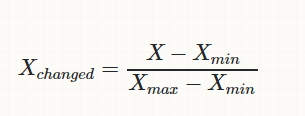

In [24]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [26]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

Let's say weight = 0.01 and bias = 0.0

In [27]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

# Sigmoid Function


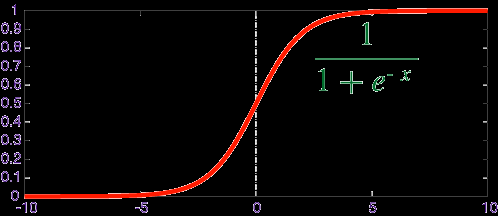

In [28]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

# Forward and Backward Propagation


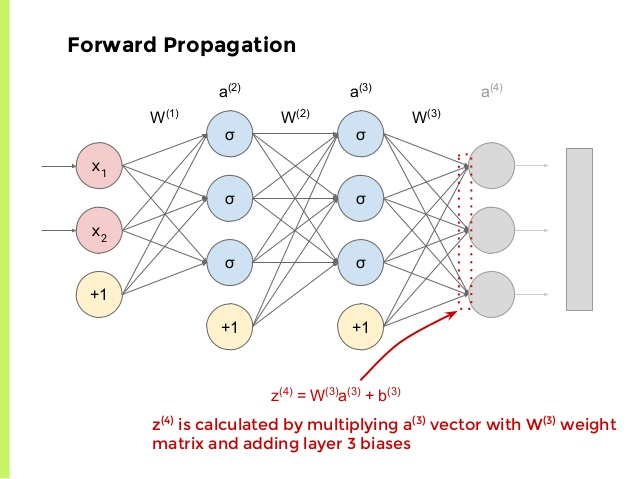

# Cost Function

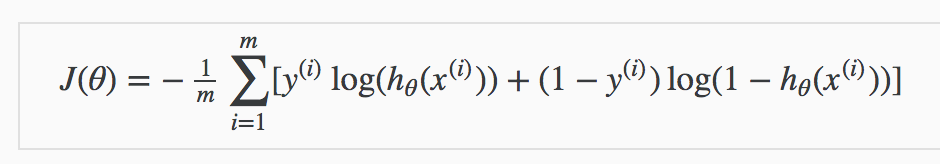

# Gradient Descent


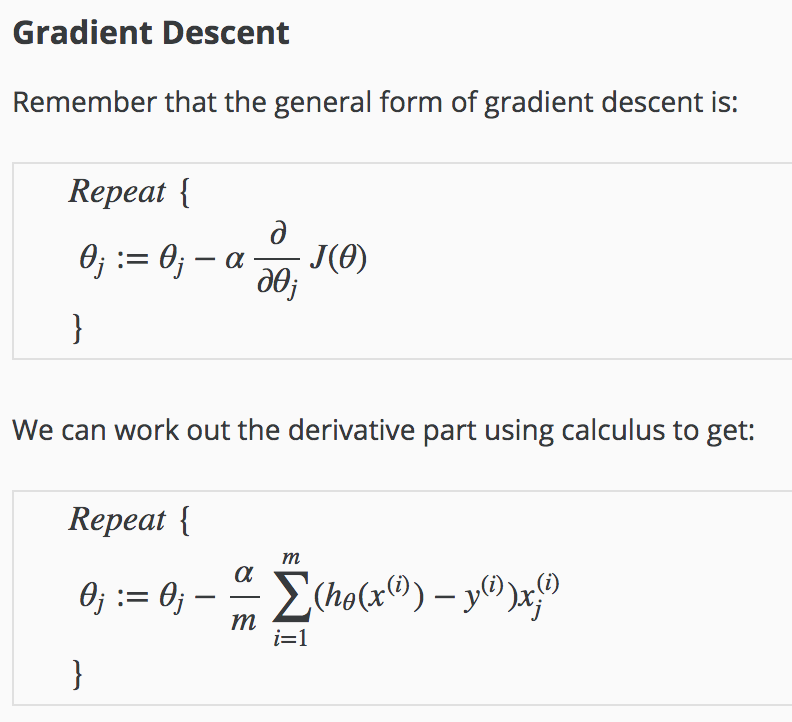

In [29]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [30]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [31]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [32]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))

iteration: 100
cost: 0.3781006236463689


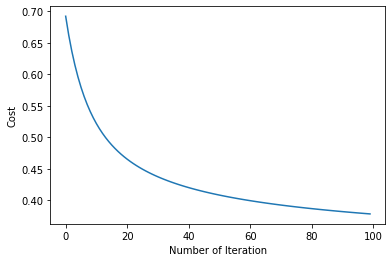

Manuel Test Accuracy: 85.25%


In [33]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

# Sklearn Logistic Regression

In [34]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))

Test Accuracy 86.89%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Support Vector Machine (SVM) Algorithm

Support Vector Machine Algorithm

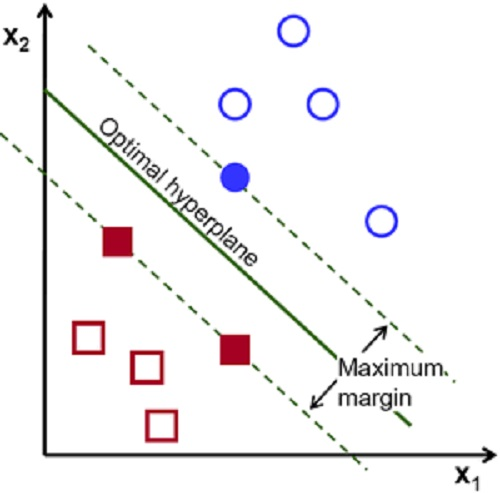

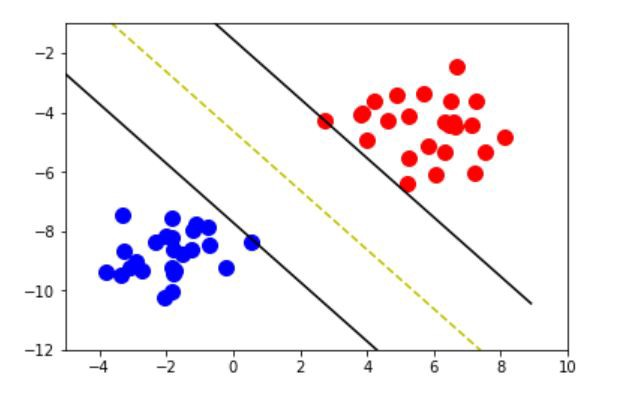

In [35]:
from sklearn.svm import SVC

In [36]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test.T,y_test.T)*100))

Test Accuracy of SVM Algorithm: 83.61%


# Naive Bayes Algorithm

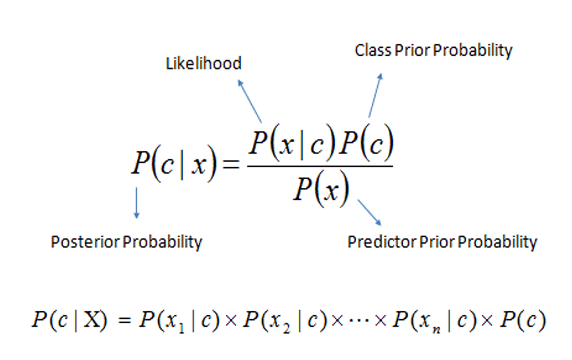

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test.T,y_test.T)*100))

Accuracy of Naive Bayes: 73.77%


# Decision Tree Algorithm

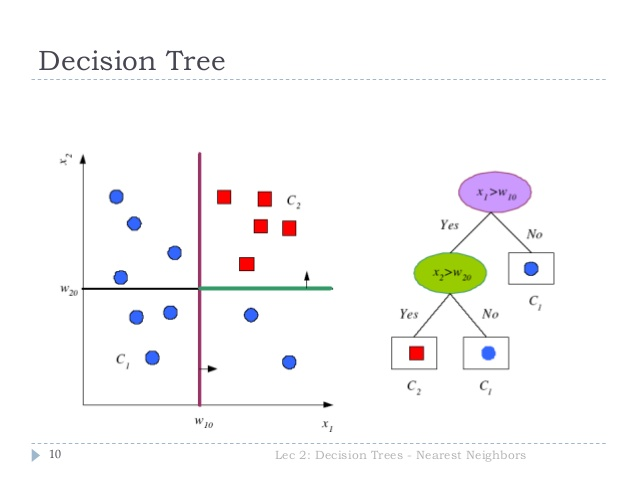

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test.T, y_test.T)*100))

Decision Tree Test Accuracy 75.41%


# Comparing Models

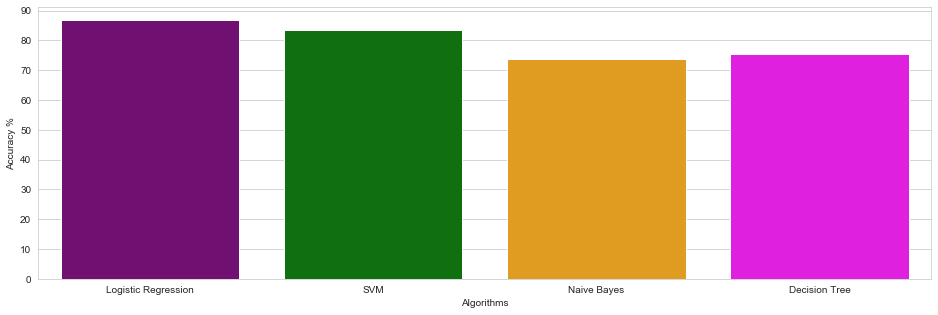

In [65]:
methods = ["Logistic Regression", "SVM", "Naive Bayes", "Decision Tree"]
accuracy = [86.89, 83.61, 73.77, 75.41]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

Our models work fine but best of them are Logistic Resression and Naive Bayes with 86.89% of accuracy

# Confusion Matrix

In [62]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)

In [63]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

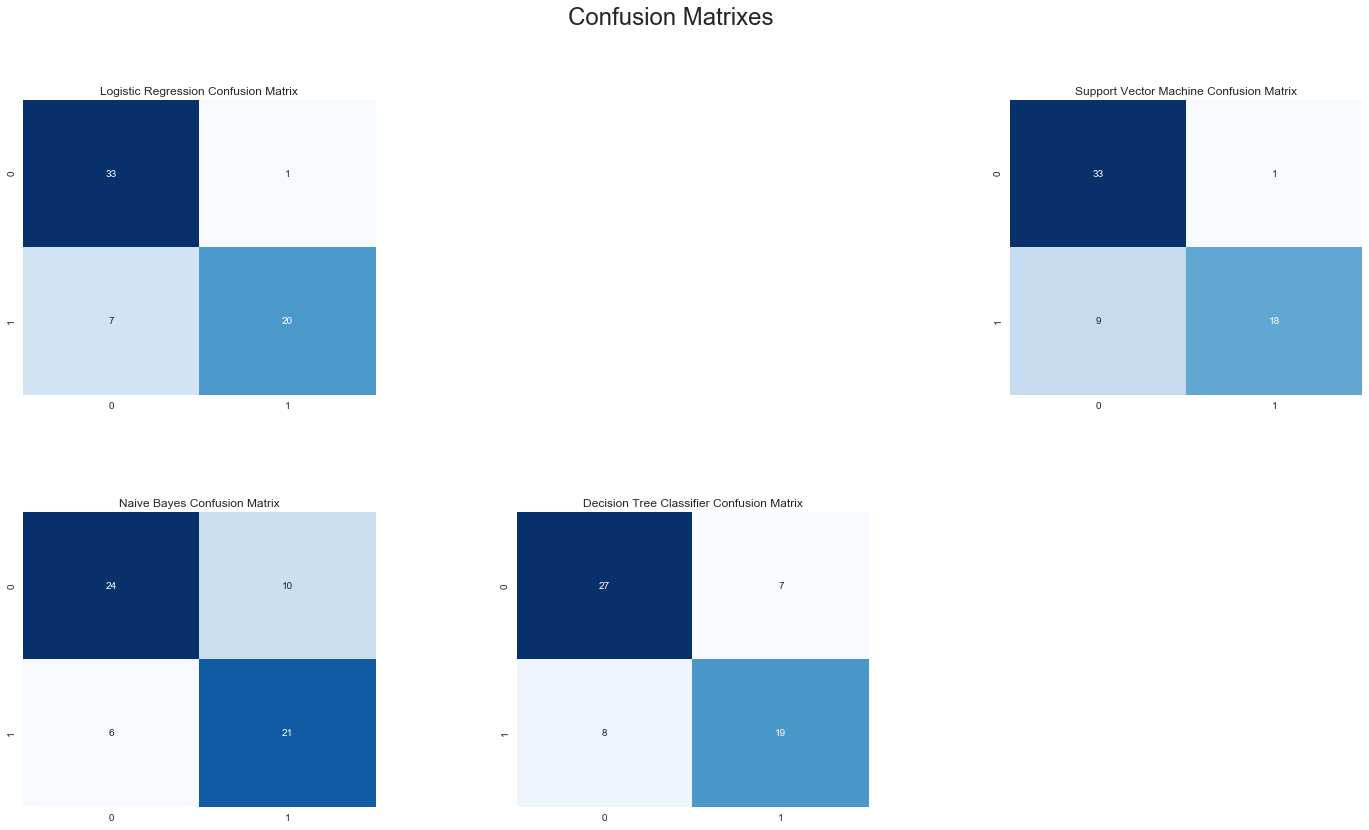

In [64]:
plt.figure(figsize=(24,13))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)


plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)


plt.show()